### Name : Prathmesh Rewatkar
### Roll no : 50
### Batch : A3
### Subject : Deep Learning Project


In [96]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [97]:
data_dir = "/content/Dataset"
train_meta = pd.read_csv(os.path.join(data_dir, "TRAIN.csv"))
train_audio = os.path.join(data_dir, "TRAIN")
test_audio = os.path.join(data_dir, "TEST")

In [98]:
def get_mfcc_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

In [99]:
features, labels = [], []
for _, row in train_meta.iterrows():
    path = os.path.join(train_audio, row['Filename'])
    feat = get_mfcc_features(path)
    features.append(feat)
    labels.append(row['Class'])

In [100]:
sample_audio = os.path.join(train_audio, train_meta['Filename'].iloc[0])
wave, sr = librosa.load(sample_audio)

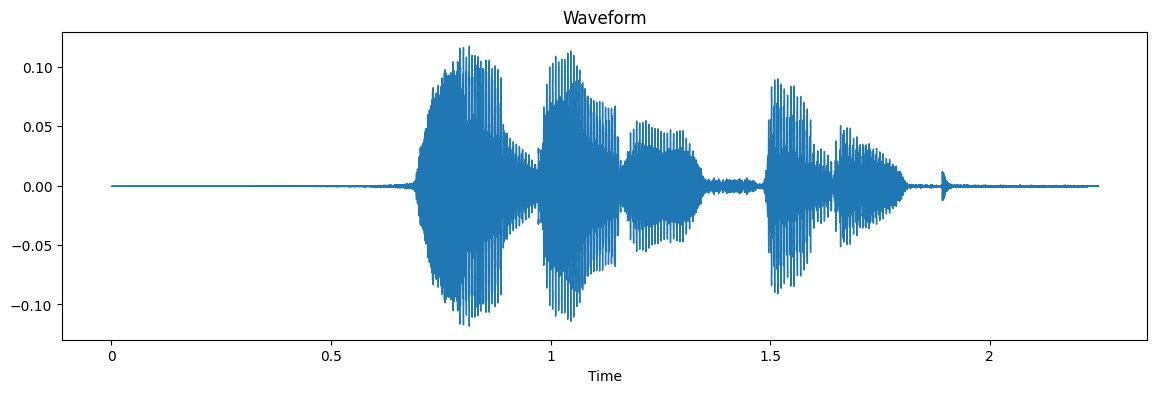

In [101]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(wave, sr=sr)
plt.title("Waveform")
plt.show()

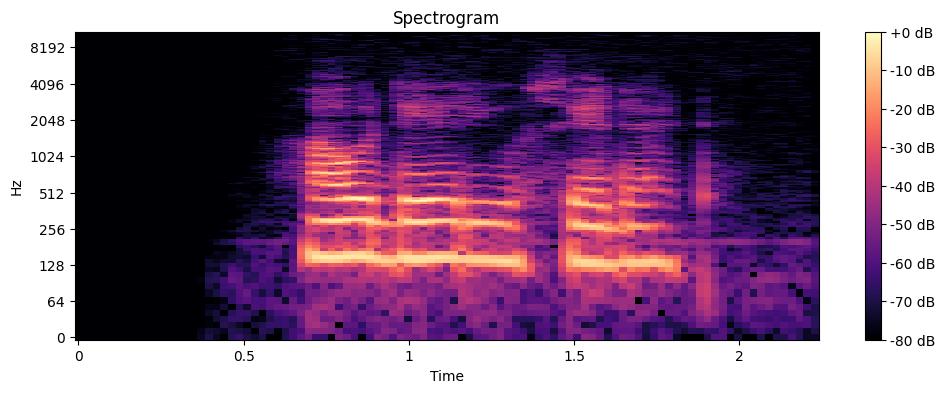

In [102]:
plt.figure(figsize=(12, 4))
spec = librosa.amplitude_to_db(np.abs(librosa.stft(wave)), ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()

In [103]:
X = np.array(features)
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
X_train.shape

(200, 40)

### ANN Model

In [106]:
# ANN model

model1 = Sequential()

model1.add(Dense(128, activation='relu', input_shape=(40,)))
model1.add(Dropout(0.3))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(3, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,699 (53.51 KB)

 Trainable params: 13,699 (53.51 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

history = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step - accuracy: 0.3616 - loss: 38.4324 - val_accuracy: 0.2800 - val_loss: 21.3880 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3603 - loss: 30.8414 - val_accuracy: 0.3000 - val_loss: 15.6535 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4168 - loss: 22.9350 - val_accuracy: 0.3200 - val_loss: 5.0936 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4341 - loss: 19.5846 - val_accuracy: 0.5000 - val_loss: 4.8961 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4744 - loss: 18.0849 - val_accuracy: 0.4200 - val_loss: 5.3609 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3886 - loss: 17.7471 - val_accuracy: 0.4400 - val_loss: 4.1241 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4308 - loss: 12.5557 - val_

In [108]:
loss, accuracy = model1.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7700 - loss: 0.6336
Validation Loss: 0.6255
Validation Accuracy: 0.7800


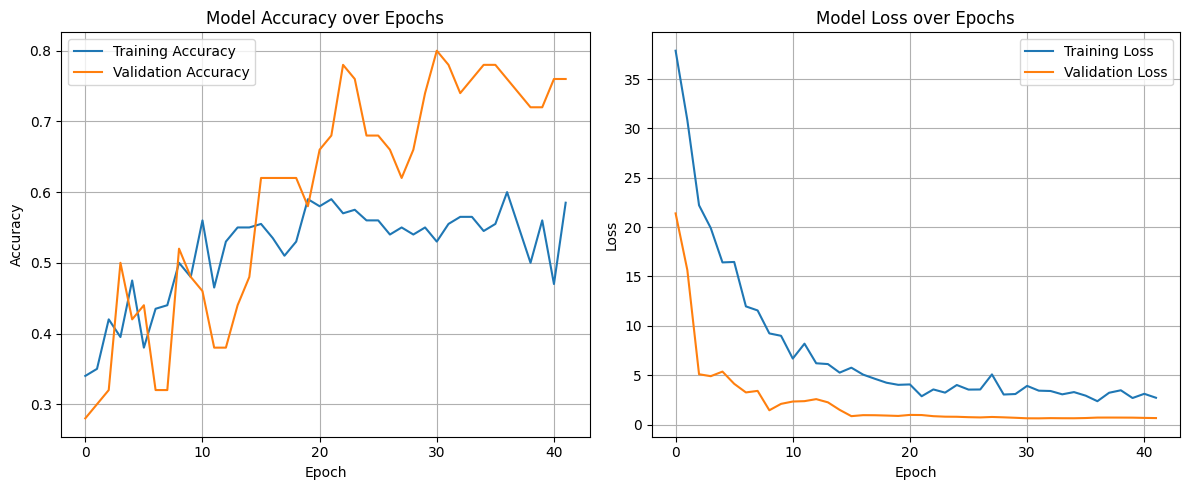

In [109]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step

 Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.93      0.82        15
     Neutral       1.00      0.75      0.86        20
    Positive       0.62      0.67      0.65        15

    accuracy                           0.78        50
   macro avg       0.79      0.78      0.78        50
weighted avg       0.81      0.78      0.78        50



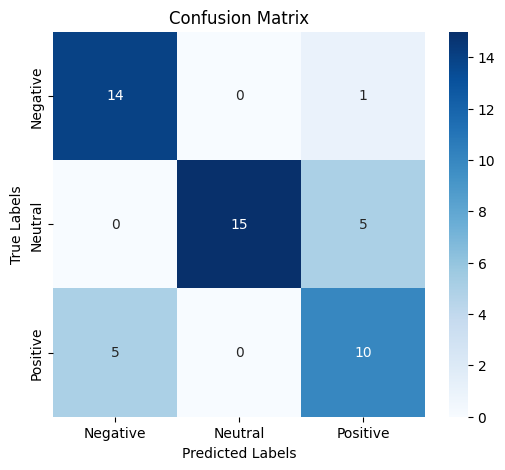

In [110]:
y_pred = model1.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print("\n Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### CNN Model

In [111]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [83]:
def get_mfcc_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

features, labels = [], []

for _, row in train_meta.iterrows():
    path = os.path.join(train_audio, row['Filename'])
    feat = get_mfcc_features(path)
    features.append(feat)
    labels.append(row['Class'])

In [84]:
sample_audio = os.path.join(train_audio, train_meta['Filename'].iloc[0])
wave, sr = librosa.load(sample_audio)

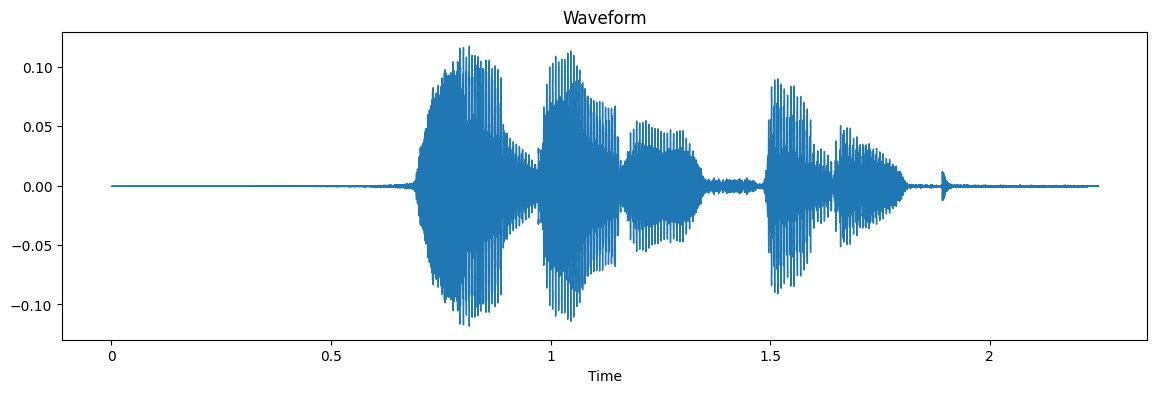

In [85]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(wave, sr=sr)
plt.title("Waveform")
plt.show()

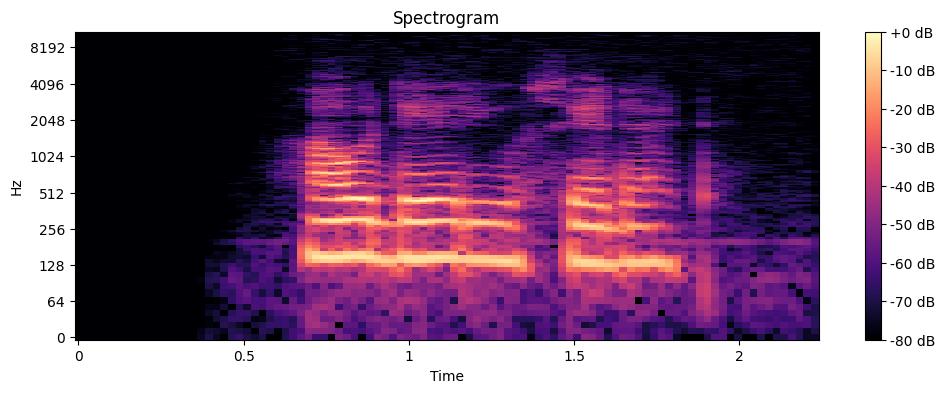

In [86]:
plt.figure(figsize=(12, 4))
spec = librosa.amplitude_to_db(np.abs(librosa.stft(wave)), ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()

In [87]:
X = np.array(features)
encoder = LabelEncoder()
y = to_categorical(encoder.fit_transform(labels))

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X_train = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_val = X_val.reshape(X_val.shape[0], 40, 1, 1)

In [90]:
X_train.shape

(200, 40, 1, 1)

In [91]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 1), activation='relu', input_shape=(40, 1, 1)))
model2.add(MaxPooling2D(pool_size=(2, 1)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 38, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 608)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │        38,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,299 (153.51 KB)

 Trainable params: 39,299 (153.51 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

history = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks
)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.3549 - loss: 16.8004 - val_accuracy: 0.4800 - val_loss: 2.1465 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3450 - loss: 8.8456 - val_accuracy: 0.4800 - val_loss: 1.5827 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5022 - loss: 4.1523 - val_accuracy: 0.6800 - val_loss: 1.1533 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5974 - loss: 1.9895 - val_accuracy: 0.8200 - val_loss: 0.3971 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6709 - loss: 1.0407 - val_accuracy: 0.7800 - val_loss: 0.3837 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6886 - loss: 0.9225 - val_accuracy: 0.9200 - val_loss: 0.2801 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7004 - loss: 0.6712 - val_accuracy

In [93]:
loss, accuracy = model2.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9021 - loss: 0.2380
Validation Loss: 0.2371
Validation Accuracy: 0.9000


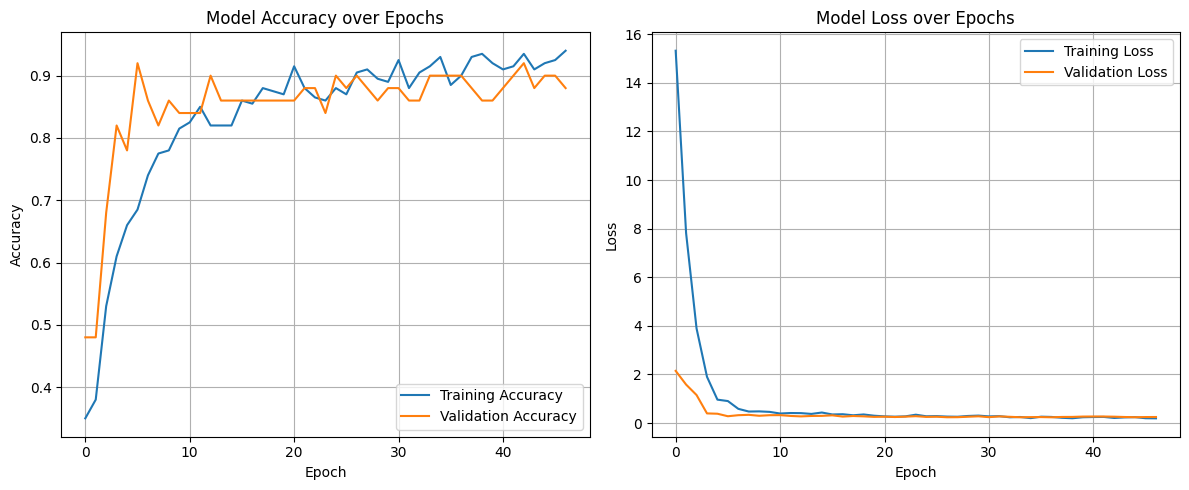

In [94]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

 Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.87      0.84        15
     Neutral       1.00      1.00      1.00        20
    Positive       0.86      0.80      0.83        15

    accuracy                           0.90        50
   macro avg       0.89      0.89      0.89        50
weighted avg       0.90      0.90      0.90        50



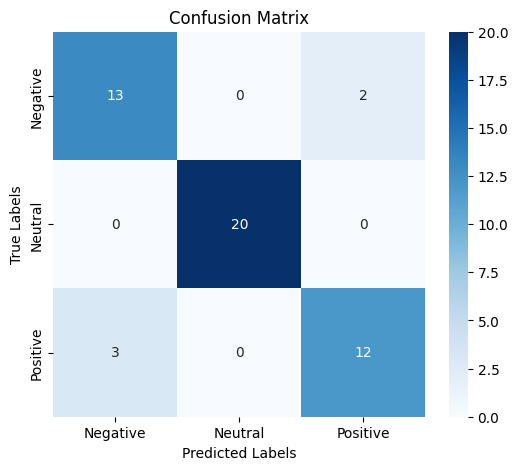

In [95]:
y_pred = model2.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print("\n Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()